# Replication of original calculations

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import linregress as linearRegression

In [2]:
extStandard = pd.read_excel("134-data-raw.xlsx", index_col="X", sheet_name="134-external-standard-data-raw")
display(extStandard)

,Sample Concentration (mg/mL),Peak Area,Pred,Residuals
X,,,,
0.25,0.007275,152888.62,0.007480,0.000205
0.50,0.014550,488388.33,0.012338,-0.002212
1.00,0.029100,1850244.00,0.032059,0.002959
2.00,0.058200,3589760.13,0.057248,-0.000952


In [3]:
slope, intercept, r_value, p_value, std_err = linearRegression(x=extStandard["Sample Concentration (mg/mL)"],
                                                               y=extStandard["Peak Area"])
display(f"slope: {slope}, intercept: {intercept}, "
        f"r_value: {r_value}, p_value: {p_value}, "
        f"std_err: std_err: {std_err}")

'slope: 69058028.4834902, intercept: -363669.069565217, r_value: 0.9952385535122216, p_value: 0.004761446487778432, std_err: std_err: 4782322.440242962'

Text(0.5, 1.0, 'External Standard Curve (R$^2$ = 0.9952)')

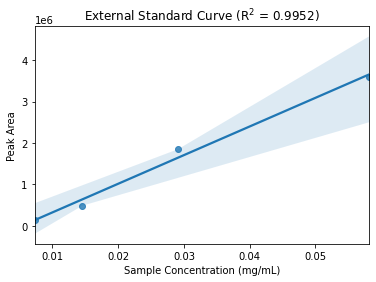

In [4]:
p = sns.regplot(x="Sample Concentration (mg/mL)", y="Peak Area", data=extStandard)
p.set_title("External Standard Curve (R$^2$ = {})".format(round(r_value, 4)))

In [5]:
pills = pd.read_excel("134-data-raw.xlsx", index_col="Pill", sheet_name="134-pill-data-raw")
display(pills)

,GCMS Area,Concentration (mg/mL),Powdered Pill in Sample (g),Initial Pill Weight,Estimated Estradiol Valerate in Pill (mg),Confidence Interval
Pill,,,,,,
1,6761580.64,0.103178,0.0977,0.1445,1.526941,0.052061
2,6107657.14,0.093709,0.1093,0.1395,1.197172,0.044926
3,6153476.16,0.094372,0.0951,0.1313,1.309073,0.048599
4,6179034.76,0.094742,0.1017,0.1360,1.271956,0.047072
5,6975218.59,0.106271,0.1207,0.1394,1.228666,0.040654
6,7355210.59,0.111774,0.1204,0.1355,1.261072,0.039615
7,8286964.05,0.125266,0.1069,0.1288,1.510105,0.042411
8,10433601.48,0.156351,0.1286,0.1428,1.744309,0.039087
9,7987559.16,0.120931,0.1242,0.1409,1.373371,0.039933


In [6]:
# let's re-estimate the ev in each pill to confirm the model was used correctly
pills["Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)"] = (
    (
    (pills["GCMS Area"]-intercept)/slope
    )*(
    pills["Initial Pill Weight"]/pills["Powdered Pill in Sample (g)"]
    )
)
display(pills)
# There seems to be an off-by-10 issues that I can't explain a year after the fact.
# Additionally, in the original model I controlled for methanol added, which I didn't do here.

,GCMS Area,Concentration (mg/mL),Powdered Pill in Sample (g),Initial Pill Weight,Estimated Estradiol Valerate in Pill (mg),Confidence Interval,Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)
Pill,,,,,,,
1,6761580.64,0.103178,0.0977,0.1445,1.526941,0.052061,0.152602
2,6107657.14,0.093709,0.1093,0.1395,1.197172,0.044926,0.119601
3,6153476.16,0.094372,0.0951,0.1313,1.309073,0.048599,0.130295
4,6179034.76,0.094742,0.1017,0.1360,1.271956,0.047072,0.126695
5,6975218.59,0.106271,0.1207,0.1394,1.228666,0.040654,0.122736
6,7355210.59,0.111774,0.1204,0.1355,1.261072,0.039615,0.125792
7,8286964.05,0.125266,0.1069,0.1288,1.510105,0.042411,0.150929
8,10433601.48,0.156351,0.1286,0.1428,1.744309,0.039087,0.173615
9,7987559.16,0.120931,0.1242,0.1409,1.373371,0.039933,0.137191


In [7]:
pills["Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)"] = pills["Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)"]*10
display(pills)

,GCMS Area,Concentration (mg/mL),Powdered Pill in Sample (g),Initial Pill Weight,Estimated Estradiol Valerate in Pill (mg),Confidence Interval,Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)
Pill,,,,,,,
1,6761580.64,0.103178,0.0977,0.1445,1.526941,0.052061,1.526016
2,6107657.14,0.093709,0.1093,0.1395,1.197172,0.044926,1.196005
3,6153476.16,0.094372,0.0951,0.1313,1.309073,0.048599,1.302949
4,6179034.76,0.094742,0.1017,0.1360,1.271956,0.047072,1.266955
5,6975218.59,0.106271,0.1207,0.1394,1.228666,0.040654,1.227359
6,7355210.59,0.111774,0.1204,0.1355,1.261072,0.039615,1.257920
7,8286964.05,0.125266,0.1069,0.1288,1.510105,0.042411,1.509287
8,10433601.48,0.156351,0.1286,0.1428,1.744309,0.039087,1.736149
9,7987559.16,0.120931,0.1242,0.1409,1.373371,0.039933,1.371910


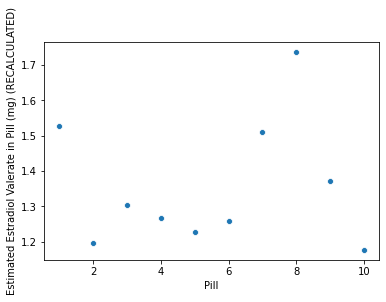

In [8]:
# Remaking this as a sanity check
sns.scatterplot(x=pills.index, y="Estimated Estradiol Valerate in Pill (mg) (RECALCULATED)", data=pills)

In [9]:
uv = pd.read_excel("134-data-raw.xlsx", index_col="wavelength (nm)", sheet_name="134-uv-vis-data-raw")
display(uv)

,0.5x,1x,2x,4x,Pill 6
wavelength (nm),,,,,
279,0.006535,-0.0001,0.0637,0.0670,0.0778
280,0.006720,0.0033,0.0654,0.0690,0.0697
281,0.009040,0.0155,0.0867,0.0941,0.0580
282,0.009665,0.0159,0.0920,0.1013,0.0701
283,0.010920,0.0193,0.0986,0.1198,0.0696
...,...,...,...,...,...
416,0.000130,-0.0007,0.0037,-0.0011,0.1019
417,0.000135,-0.0009,0.0037,-0.0010,0.1027
418,0.000170,-0.0004,0.0041,-0.0007,0.0964


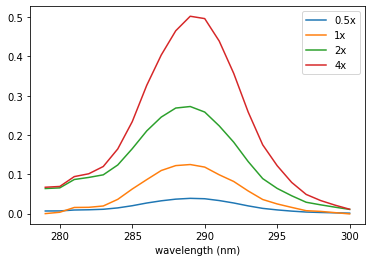

In [10]:
uv[["0.5x", "1x", "2x", "4x"]].loc[279:300].plot()

In [11]:
x = list(uv[["0.5x", "1x", "2x", "4x"]].loc[289])
y = [0.5, 1, 2, 4]
slope, intercept, r_value, p_value, std_err = linearRegression(x, y)
display(f"slope: {slope}, intercept: {intercept}, "
        f"r_value: {r_value}, p_value: {p_value}, "
        f"std_err: std_err: {std_err}")
display("R2 = {}".format(round(r_value,4)))

'slope: 7.6020581954683095, intercept: 0.09167117821606663, r_value: 0.9965645063107781, p_value: 0.0034354936892219134, std_err: std_err: 0.44673196380136687'

'R2 = 0.9966'